<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Projeto**: Concessão de cartões de crédito

**Autor:** Júlia Caroline Araújo da Silva<br>
**Data de entrega:** 15 de maio de 2024<br>
**Última atualização:** 9 de março de 2025


---

## Índice

- [Etapa 1 CRISP-DM: Entendimento do negócio](#1)
- [Etapa 2 Crisp-DM: Entendimento dos dados](#2)
- [Etapa 3 Crisp-DM: Preparação dos dados](#3)
    > - [Import das bibliotecas/pacotes](#import)
    > - [Análise Descritiva](#leitura)
    >> - [Análise Univariada](#univariada)
    >> - [Análise Bivariada](#bivariada)
- [Etapa 4 Crisp-DM: Modelagem](#4)
- [Etapa 5 Crisp-DM: Avaliação dos resultados](#5)
- [Etapa 6 Crisp-DM: Implantação](#6)

## Etapa 1 CRISP - DM: Entendimento do negócio

**Este é um problema de concessão de cartões de crédito**, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito. **O objetivo é construir um modelo preditivo para identificar o risco de inadimplência** (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos do negócio: O objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem: O objetivo consiste em desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.

## Etapa 2 Crisp-DM: Entendimento dos dados

Abaixo está um resumo das variáveis principais e suas descrições:



| Variável            | Descrição                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|

## Etapa 3 Crisp-DM: Preparação dos dados

#### Importação das bibliotecas/pacotes

In [ ]:
# Importar os pacotes necessários
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar o arquivo
df = pd.read_csv('demo01.csv')

In [ ]:
# Verificar as primeiras linhas
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [ ]:
# Verificar o formato do dataframe e as informações gerais
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [ ]:
# Verificar valores ausentes
print(df.isnull().sum())

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64


In [ ]:
# Verificar duplicatas
print(f"Número de duplicatas: {df.duplicated().sum()}")

Número de duplicatas: 9880


In [ ]:
# Remover duplicatas
df_sem_duplicatas = df.drop_duplicates()


In [ ]:
# Verificar o número de duplicatas após a remoção
print(f"Número de duplicatas após remoção: {df_sem_duplicatas.duplicated().sum()}")

Número de duplicatas após remoção: 0


### Análise Descritiva

#### 1. Análise Univariada

In [ ]:
# Obter resumo estatístico das variáveis númericas
var_numericas = ['qtd_filhos', 'idade', 'qt_pessoas_residencia']
print("\nEstatísticas Descritivas das Variáveis Numéricas:")
print(df[var_numericas].describe())


Estatísticas Descritivas das Variáveis Numéricas:
         qtd_filhos         idade  qt_pessoas_residencia
count  16650.000000  16650.000000           16650.000000
mean       0.433153     44.319513               2.211892
std        0.739395     11.228837               0.903755
min        0.000000     22.030137               1.000000
25%        0.000000     34.873973               2.000000
50%        0.000000     43.493151               2.000000
75%        1.000000     53.410959               3.000000
max       14.000000     68.909589              15.000000


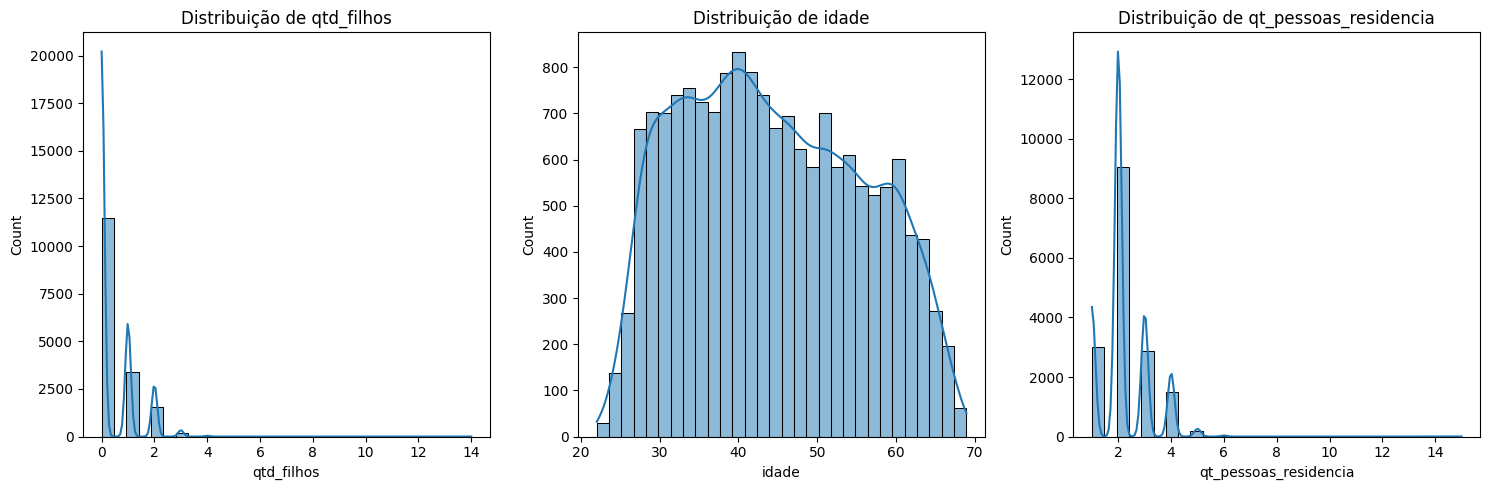

In [ ]:
# Histogramas para as variáveis numéricas
plt.figure(figsize=(15, 5))
for i, variavel in enumerate(var_numericas, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[variavel], kde=True, bins=30)
    plt.title(f'Distribuição de {variavel}')
plt.tight_layout()
plt.show()

In [ ]:
# Contagem de cada valor para as variáveis categóricas
var_categoricas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
print("\nContagem de Categorias:")
for variavel in var_categoricas:
    print(f"\n{variavel}:")
    print(df[variavel].value_counts(normalize=True))


Contagem de Categorias:

sexo:
sexo
F    0.672733
M    0.327267
Name: proportion, dtype: float64

posse_de_veiculo:
posse_de_veiculo
N    0.611291
Y    0.388709
Name: proportion, dtype: float64

posse_de_imovel:
posse_de_imovel
Y    0.671231
N    0.328769
Name: proportion, dtype: float64

tipo_renda:
tipo_renda
Working                 0.514414
Commercial associate    0.229790
Pensioner               0.168168
State servant           0.087147
Student                 0.000480
Name: proportion, dtype: float64

educacao:
educacao
Secondary / secondary special    0.675375
Higher education                 0.273333
Incomplete higher                0.038979
Lower secondary                  0.011291
Academic degree                  0.001021
Name: proportion, dtype: float64

estado_civil:
estado_civil
Married                 0.701502
Single / not married    0.122222
Civil marriage          0.077057
Separated               0.056757
Widow                   0.042462
Name: proportion, dtype: float64

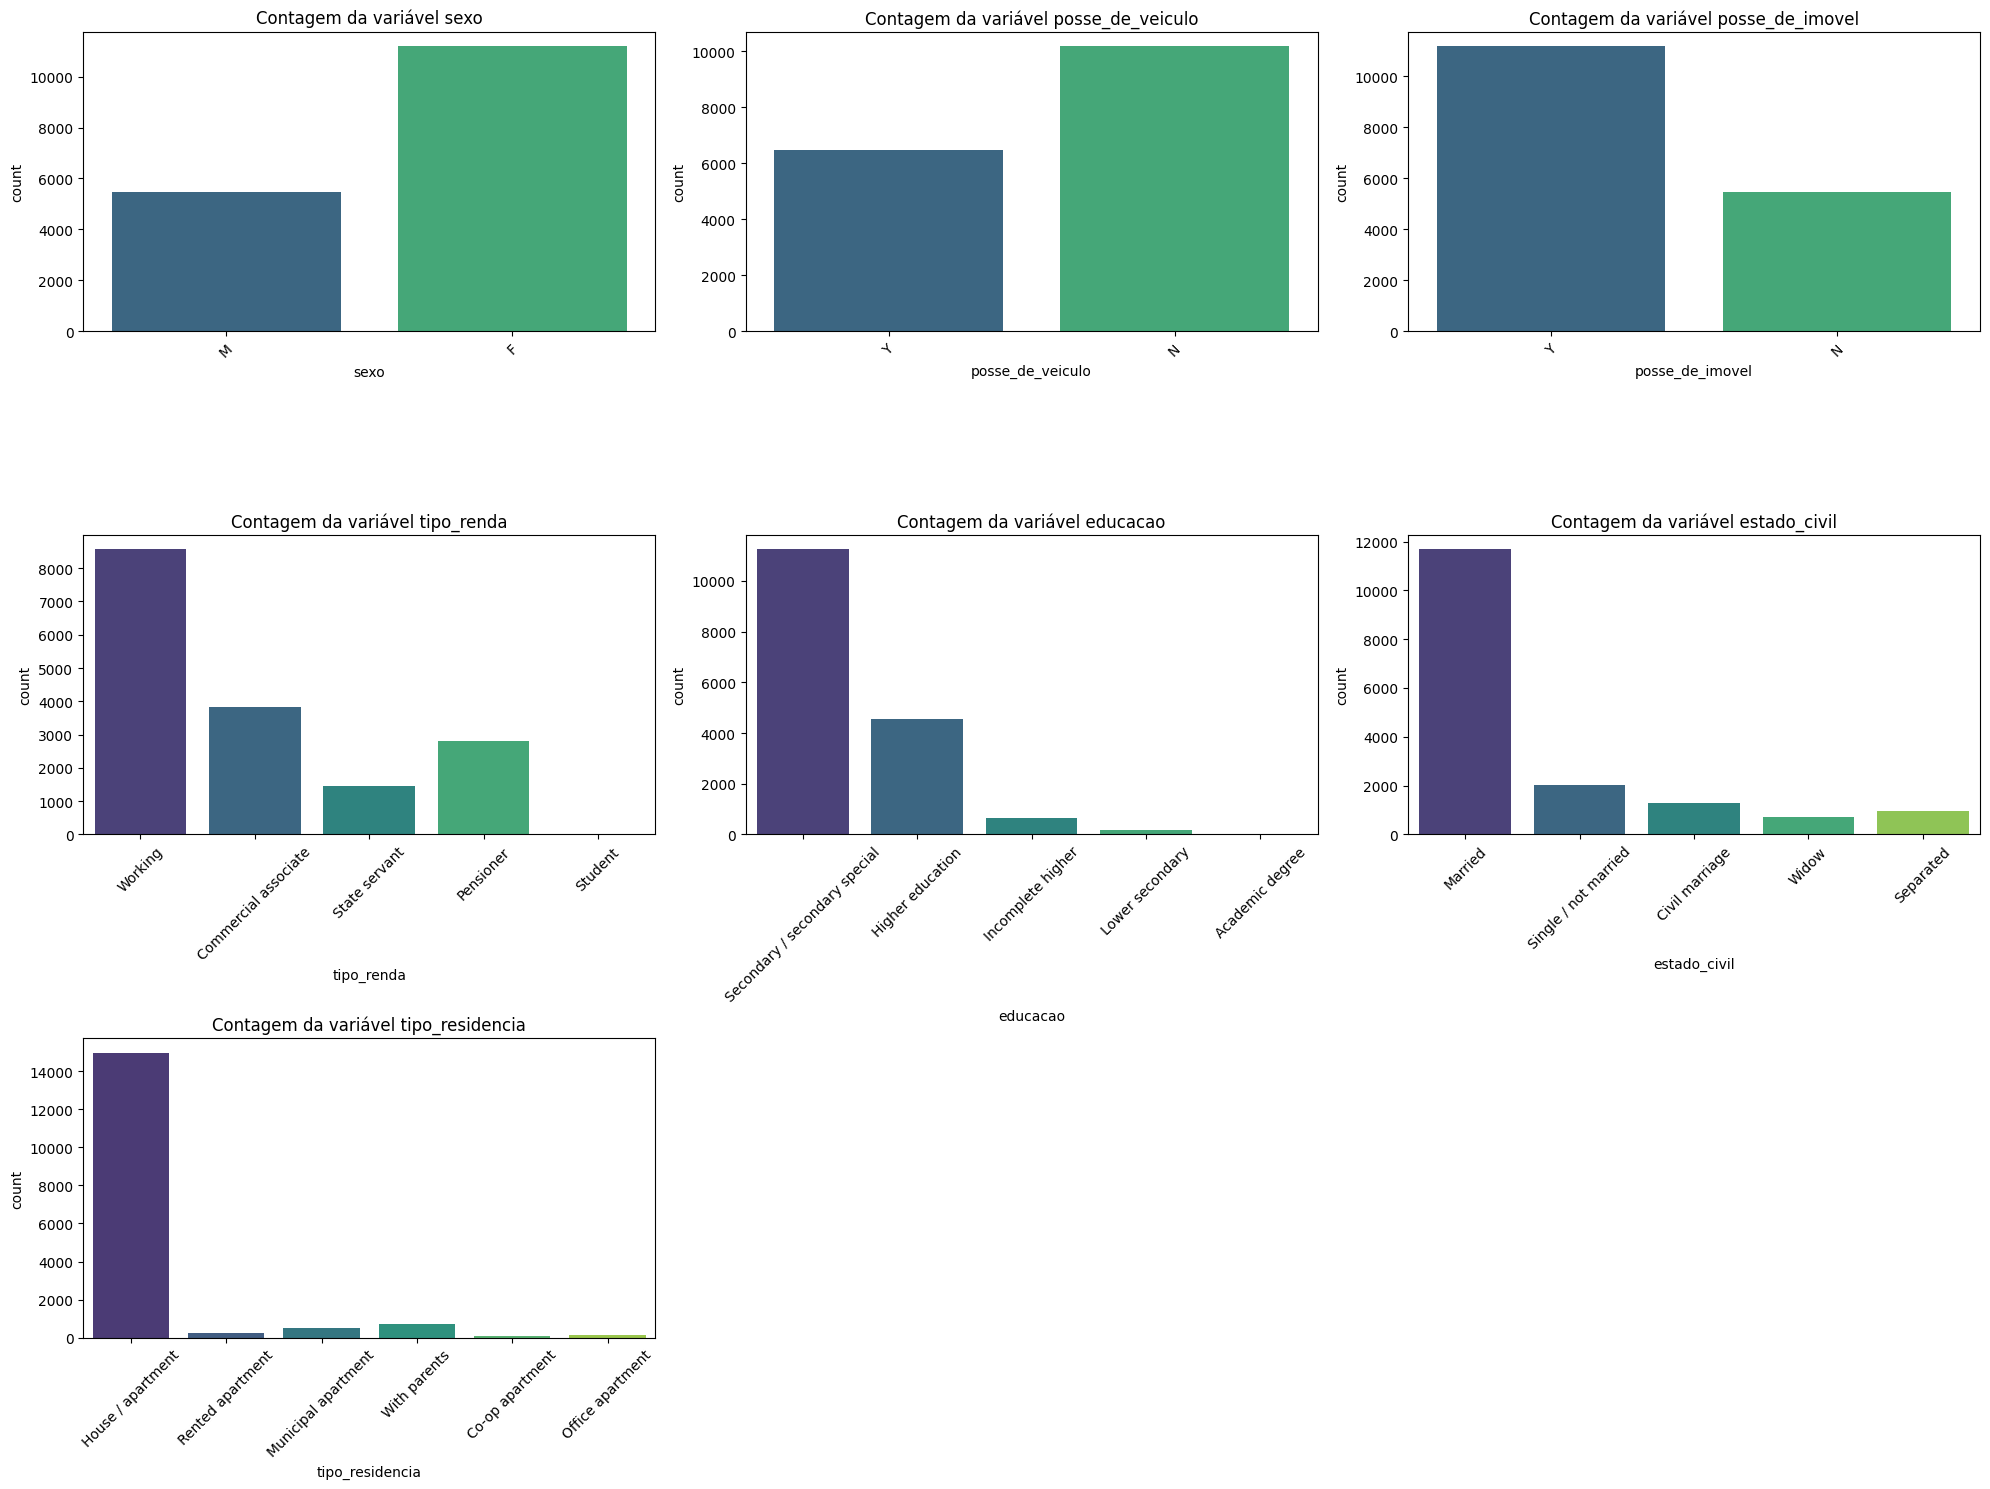

In [ ]:
# Gráficos de barras para as variáveis categóricas
plt.figure(figsize=(20, 15))
for i, variavel in enumerate(var_categoricas, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=variavel, data=df, hue=variavel, palette='viridis', legend=False)
    plt.title(f'Contagem da variável {variavel}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2. Análise Bivarida

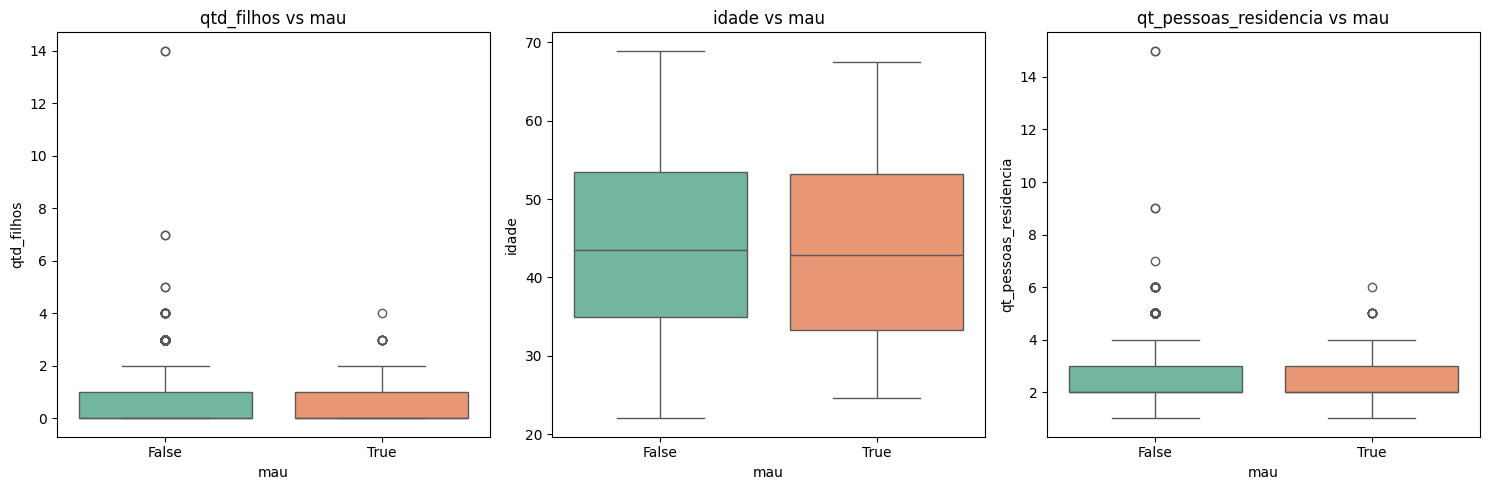

In [ ]:
# Visualizar a relação entre as variáveis numéricas e a variável target (mau)
plt.figure(figsize=(15, 5))
for i, variavel in enumerate(var_numericas, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='mau', y=variavel, data=df, hue='mau', palette='Set2', legend=False)
    plt.title(f'{variavel} vs mau')
plt.tight_layout()
plt.show()

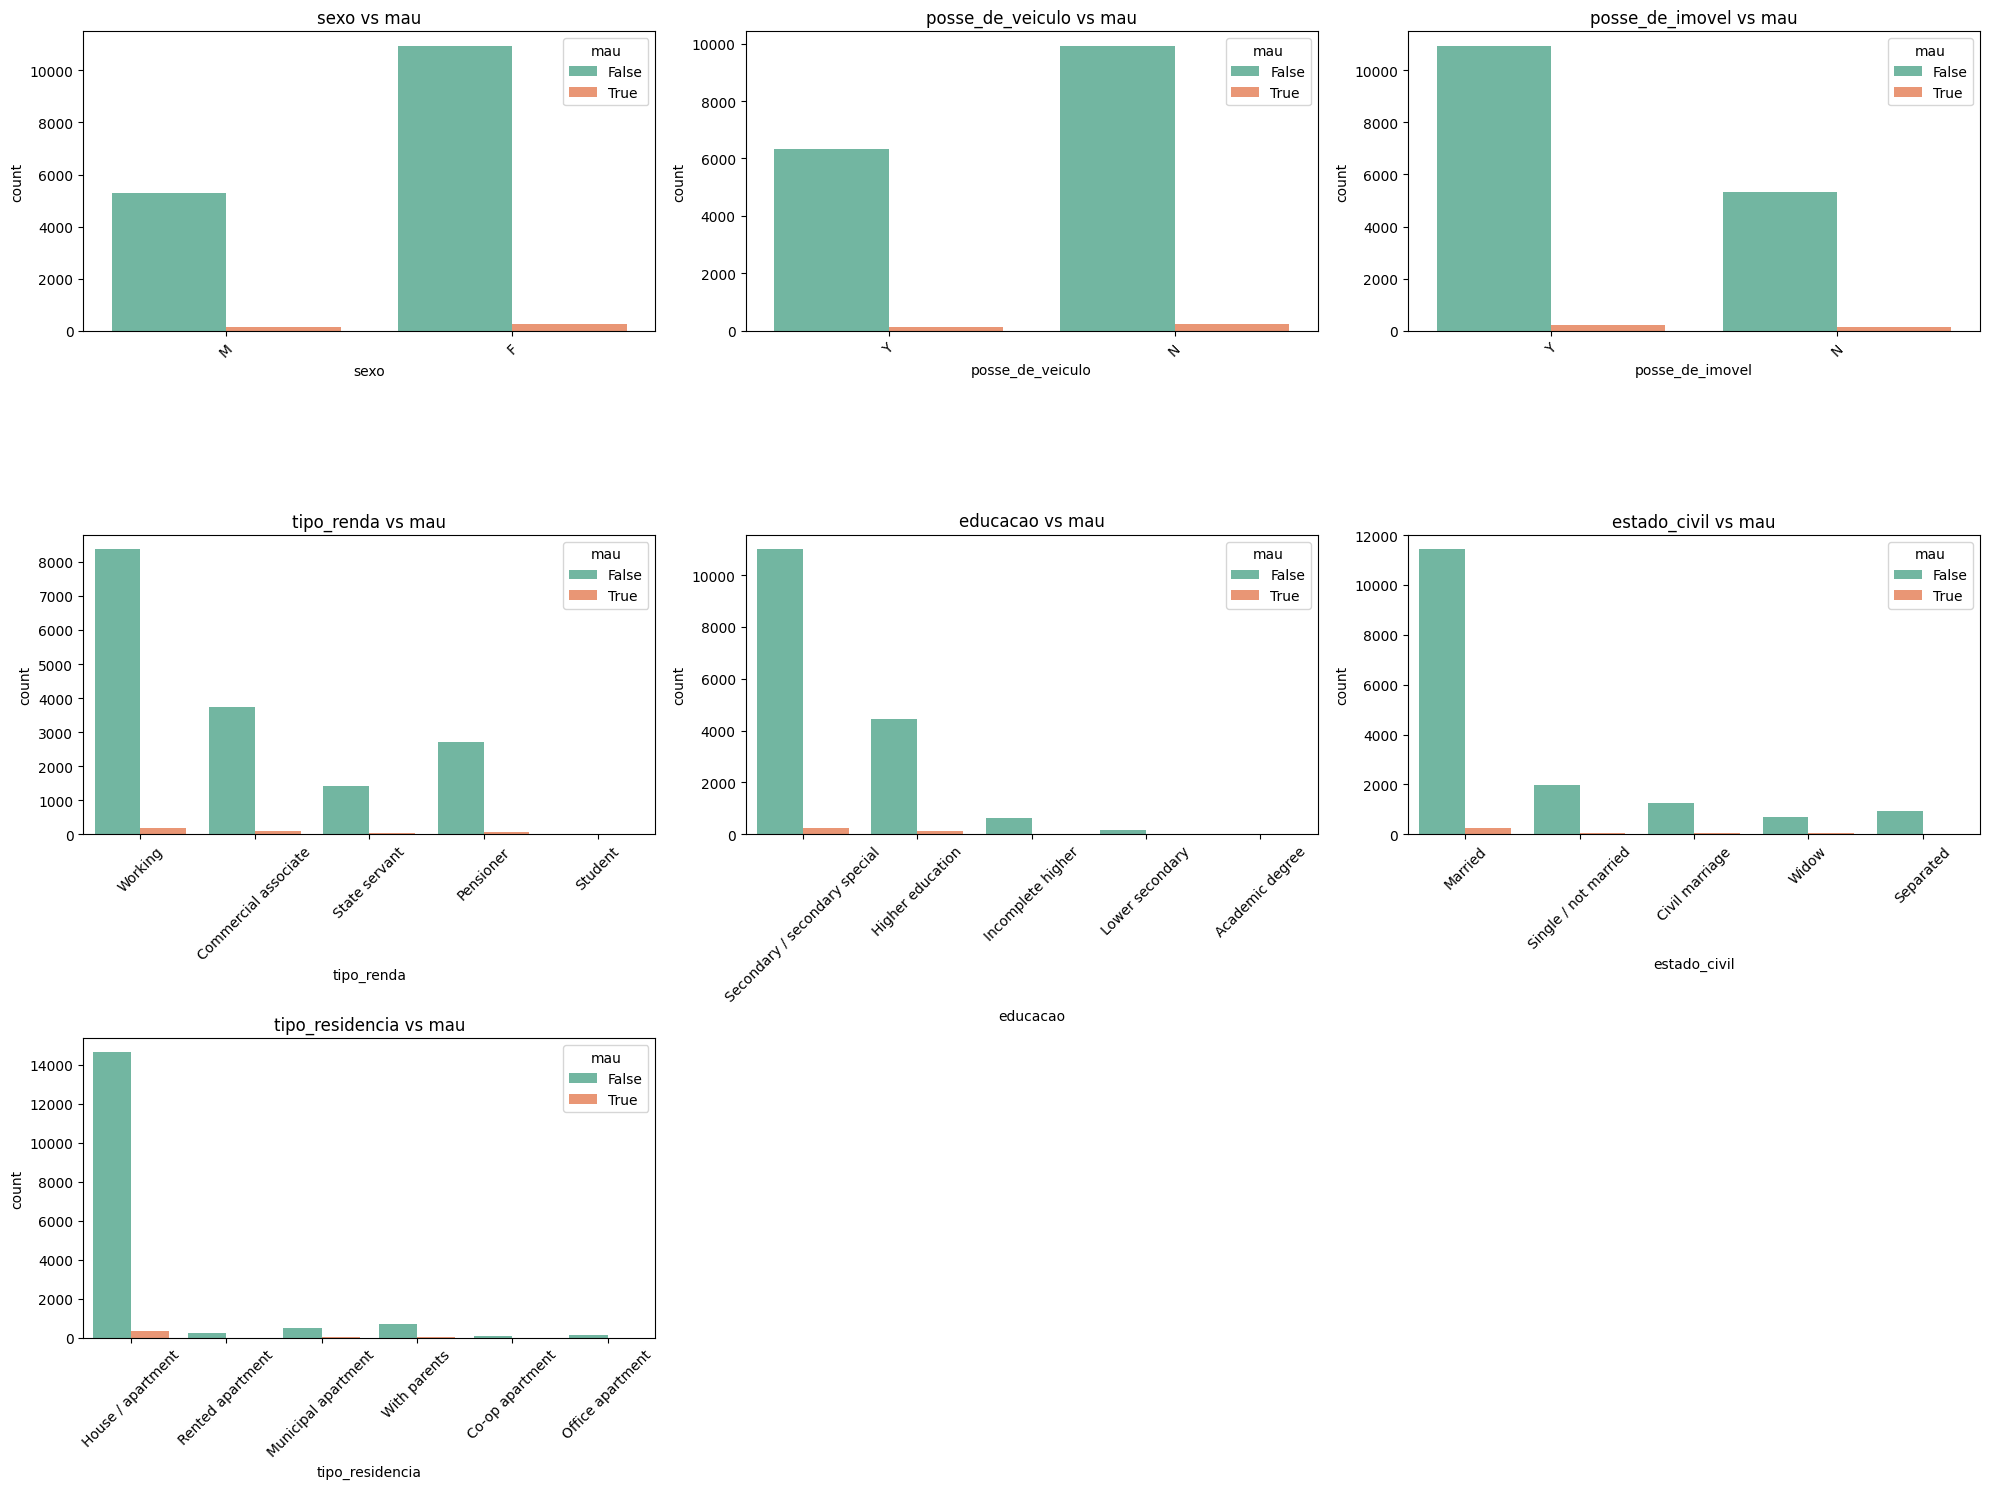

In [ ]:
# Visualiazar a relação entre as variáveis categóricas e a variável target (mau)
plt.figure(figsize=(20, 15))
for i, variavel in enumerate(var_categoricas, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=variavel, hue='mau', data=df, palette='Set2')
    plt.title(f'{variavel} vs mau')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

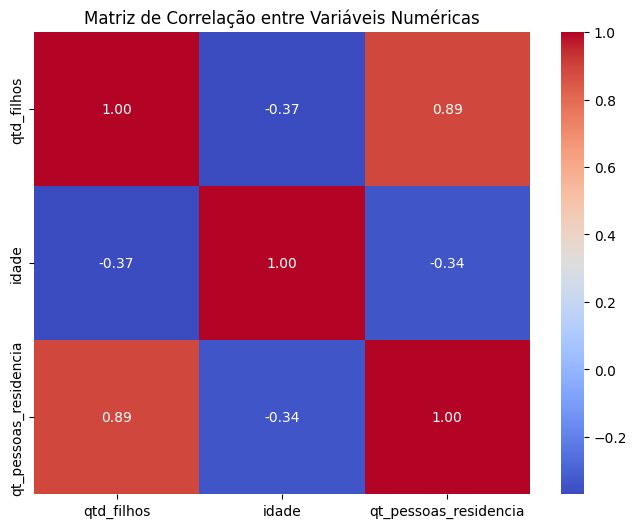

In [ ]:
# Verificar a correlação entre as variáveis numéricas
matriz_corr = df[var_numericas].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

## Etapa 4 Crisp-DM: Modelagem

In [ ]:
# Separar as variáveis independentes (X) e dependente (y)
X = df.drop('mau', axis=1)
y = df['mau']

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Pipeline de Pré-processamento
# Separar as variáveis numéricas e categóricas
var_numericas = ['qtd_filhos', 'idade', 'qt_pessoas_residencia']
var_categoricas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

In [ ]:
# Pipeline para as variáveis numéricas
pipeline_numerico = Pipeline(steps=[
    ('scaler', StandardScaler())  # Padronização
])

In [ ]:
# Pipeline para as variáveis categóricas
pipeline_categorico = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificação one-hot
])

In [ ]:
# Combinar pipelines em um ColumnTransformer
preprocessador = ColumnTransformer(
    transformers=[
        ('num', pipeline_numerico, var_numericas),
        ('cat', pipeline_categorico, var_categoricas)
    ])

In [ ]:
# Aplicar o pré-processamento aos dados de treino e teste
X_train_preprocessado = preprocessador.fit_transform(X_train)
X_test_preprocessado = preprocessador.transform(X_test)

In [ ]:
# Tratar de desequilíbrio de classes com SMOTE
smote = SMOTE(random_state=42)
X_train_reamostrado, y_train_reamostrado = smote.fit_resample(X_train_preprocessado, y_train)

In [ ]:
# Modelar com Random Forest
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_reamostrado, y_train_reamostrado)

RandomForestClassifier(random_state=42)

## Etapa 5 Crisp-DM: Avaliação dos resultados

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test_preprocessado)
y_pred_proba = modelo.predict_proba(X_test_preprocessado)[:, 1]  # Probabilidades para AUC-ROC

In [ ]:
# Verificar as métricas de avaliação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.98      0.97      0.98      4887
        True       0.16      0.29      0.21       108

    accuracy                           0.95      4995
   macro avg       0.57      0.63      0.59      4995
weighted avg       0.97      0.95      0.96      4995

AUC-ROC: 0.7392581603498322


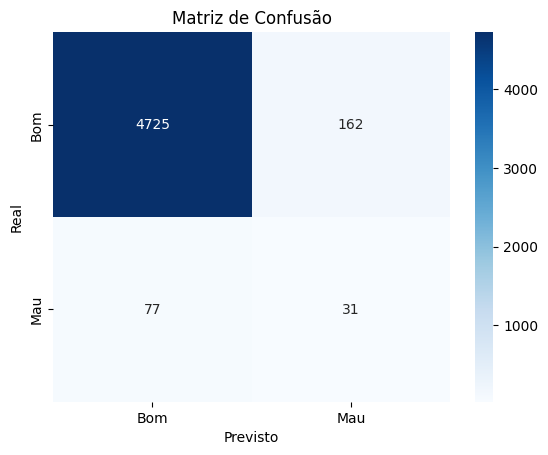

In [ ]:
# Matriz de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=['Bom', 'Mau'], yticklabels=['Bom', 'Mau'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

#### Análise das variáveis e seu impacto no **risco de inadimplência**:
**a)** Quantidade de filhos (`qtd_filhos`):
- Relação com Inadimplência: Há uma correlação negativa moderada entre a quantidade de filhos e a inadimplência. Clientes com mais filhos tendem a ter um risco ligeiramente maior de inadimplência.

**Insight:** Famílias maiores podem enfrentar despesas mais altas, o que pode aumentar o risco de inadimplência. No entanto, essa relação não é muito forte.

**b)** Idade (`idade`):
- Relação com Inadimplência: Clientes mais jovens (abaixo de 40 anos) têm um risco maior de inadimplência, enquanto clientes mais velhos (acima de 50 anos) tendem a ser mais confiáveis.

**Insight:** Jovens podem ter menos estabilidade financeira ou experiência no gerenciamento de crédito, aumentando o risco de inadimplência.

**c)** Quantidade de pessoas na residência (`qt_pessoas_residencia`):
- Relação com Inadimplência: Há uma correlação negativa forte entre a quantidade de pessoas na residência e a inadimplência. Residências com mais pessoas tendem a ter um risco maior de inadimplência.

**Insight:** Residências com mais pessoas podem indicar despesas compartilhadas ou dependentes financeiros, o que pode aumentar o risco de inadimplência.

#### Identificação de **padrões de risco**:
**a)** Perfil de baixo risco:

- Clientes sem filhos ou com poucos filhos.

- Clientes mais velhos (acima de 50 anos).

- Residências com menos pessoas (1 ou 2).

**b)** Perfil de alto risco:

- Clientes com muitos filhos.

- Clientes mais jovens (abaixo de 40 anos).

- Residências com muitas pessoas (acima de 4).

#### Ações com base nos **insights**:
**a)** Segmentação de clientes:
- Priorizar a concessão de crédito para clientes com perfil de baixo risco (sem filhos, mais velhos, residências menores).

**b)** Monitoramento de clientes de alto risco:
- Acompanhar de perto clientes jovens, com muitos filhos ou em residências com muitas pessoas, oferecendo limites de crédito mais conservadores.

**c)** Programas de educação financeira:
- Oferecer orientação financeira para clientes jovens ou com famílias grandes, ajudando-os a gerenciar melhor suas finanças.

## Etapa 6 Crisp-DM: Implantação

In [ ]:
# Salvar o modelo treinado para uso futuro
import joblib
joblib.dump(modelo, 'modelo_cartao_credito.pkl')

# Exemplo de como carregar e usar o modelo salvo
# modelo_carregado = joblib.load('modelo_cartao_credito.pkl')
# nova_previsao = modelo_carregado.predict(novos_dados)